# 2.2 Discrete-Time Signals

In [1]:
import numpy as np
import scipy
from scipy import io
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# for plottig sample signals
n = np.arange(-20,21,1)

def myplot(n,y):
    plt.figure(figsize=(15,4))
    plt.xticks(n)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid()
    plt.bar(n,y,width=0.15,align='center')
    plt.plot(n,y,'ro',markersize=6)



## Special Sequences
Impulse (Delta function):
\begin{eqnarray}
 \delta[n] &=& 1, \quad n = 0 \\
           &=& 0, \quad n \neq 0.
\end{eqnarray}

Unit step:
\begin{eqnarray}
 u[n] &=& 1, \quad n \ge 0 \\
      &=& 0, \quad n \lt 0.
\end{eqnarray}

Exponential sequence:
\begin{eqnarray}
 x[n] &=& A\alpha^n
\end{eqnarray}

Sinusodial sequence:
\begin{eqnarray}
 x[n] &=& A\cos(\omega n + \phi)
\end{eqnarray}

Complex exponential sequence:
\begin{eqnarray}
 x[n] &=& Ae^{j \omega n} \\
      &=& |A|e^{j \phi} e^{j \omega n} \\
      &=& |A|e^{j(\phi+\omega n)} \\
      &=& |A|\cos(\omega n + \phi) + j|A|\sin(\omega n + \phi)\\
\end{eqnarray}



In [3]:
# Impulse
def impulse(n):
    if(n==0):
        return(1)
    else:
        return(0)

    
# Unit step
def unit(n):
    if(n>=0):
        return(1)
    else:
        return(0)
    
# Exponential sequence
class ExpSeq:
    def __init__(self, A, alpha):
        self.A = A
        self.alpha = alpha
    def func(self, n):
        return(self.A*self.alpha**n)
    
# Sinusodial sequence
class SinSeq:
    def __init__(self, A, omega, phi):
        self.A = A
        self.omega = omega
        self.phi = phi
    def func(self, n):
        return(self.A*np.cos(self.omega*n+self.phi))


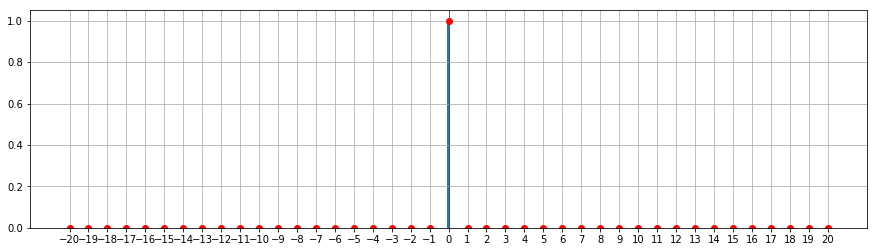

In [4]:
# plot impulse
y = list(map(impulse,n))

myplot(n,y)

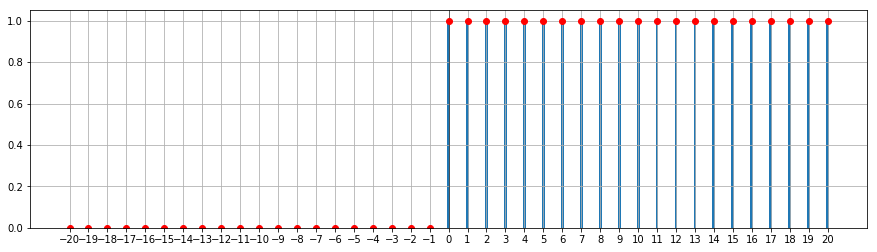

In [5]:
# plot unit function
y = list(map(unit,n))

myplot(n,y)

/usr/local/src/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


[16.45052667993991, nan, -14.80547401194592, nan, 13.324926610751328, nan, -11.992433949676196, nan, 10.793190554708577, nan, -9.713871499237719, nan, 8.742484349313948, nan, -7.868235914382552, nan, 7.081412322944297, nan, -6.373271090649868, nan, 5.735943981584882, nan, -5.162349583426393, nan, 4.646114625083754, nan, -4.181503162575379, nan, 3.763352846317841, nan, -3.387017561686057, nan, 3.0483158055174515, nan, -2.743484224965706, nan, 2.4691358024691357, nan, -2.2222222222222223, nan, 2.0, nan, -1.8, nan, 1.62, nan, -1.4580000000000002, nan, 1.3122, nan, -1.1809800000000001, nan, 1.062882, nan, -0.9565938000000002, nan, 0.8609344200000002, nan, -0.7748409780000002, nan, 0.6973568802000002, nan, -0.6276211921800001, nan, 0.5648590729620002, nan, -0.5083731656658002, nan, 0.4575358490992202, nan, -0.41178226418929814, nan, 0.3706040377703683, nan, -0.33354363399333153, nan, 0.30018927059399836, nan, -0.27017034353459857, nan, 0.2431533091811387, nan]


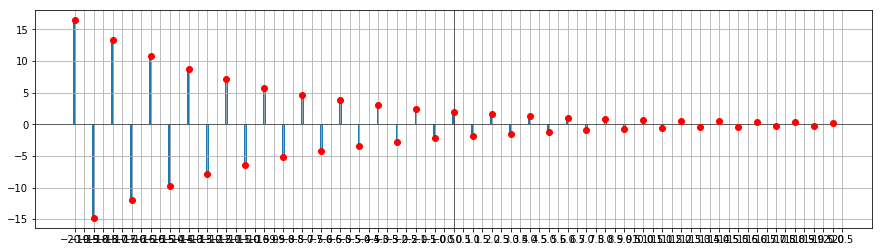

In [16]:
# plot exponential sequence
A = 2.0
alpha = -0.9
myExpSeq = ExpSeq(A, alpha)
y = list(map(myExpSeq.func,n))
#y = myExpSeq.func(n)
myplot(n,y)

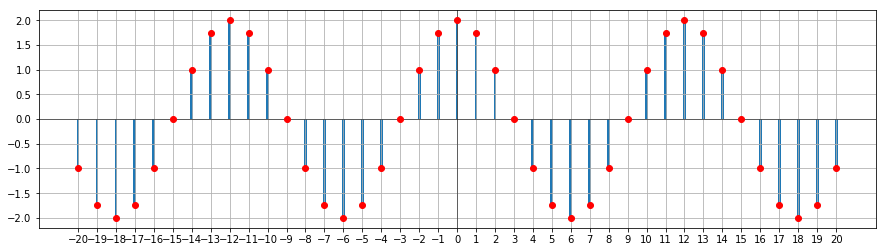

In [7]:
# plot exponential sequence
N = 12
A = 2
phi = 0
omega = 2*np.pi/N  # This value satisfied N = integer = 2*pi*k/N
mySinSeq = SinSeq(A, omega, phi)
y = list(map(mySinSeq.func,n))
#y = mySinSeq.func(n)

myplot(n,y)

## 2.3 Discrete-Time Systems: Linear time-invariant (LTI) systems
## Convolution

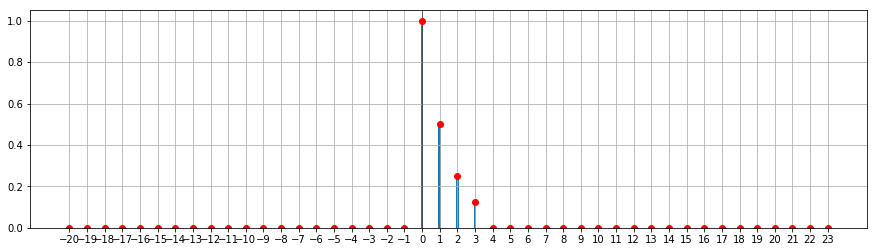

In [8]:
h = np.array([1,0.5,0.25,0.125]) # Example 2.1: a=0.5, truncation at 4

y = list(map(impulse,n))
# y = list(map(unit,n))
# y = list(map(myExpSeq.func,n))
# y = list(map(mySinSeq.func,n))

nn = np.arange(-20,21+h.shape[0]-1,1) # Length of output: M+L-1
out = np.convolve(h,y)
myplot(nn,out)


## Home work
Make convolution function by yourself.

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    1.    0.5   0.25  0.125
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]


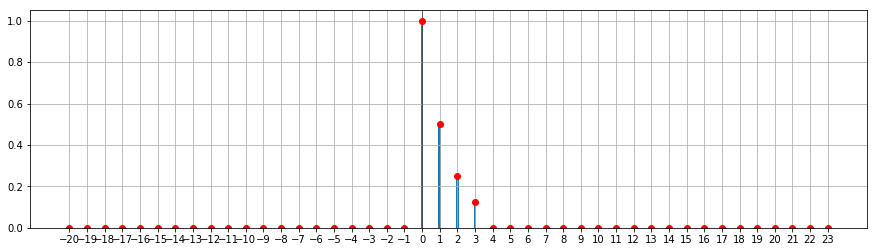

In [9]:
# Hint
def myConvolve(h,x):
    M = h.shape[0]
    L = x.shape[0]
    N = M + L - 1   # output sequence
    h_inv = h[::-1] # flipping h
    
    out = np.zeros(N)
    
    #Make convolution function by myself.
    #zero padding
    x_ = np.zeros(L+2*(M-1)) 
    x_[M-1:-(M-1)] = x
    
    #conv
    for i in range(N):
        out[i] = np.dot(x_[i:i+M],h_inv)
    
    # 
    # out[0] = x[0]*h[0]
    # out[1] = x[1]*h[0] + x[0]*h[1]
    # out[2] = x[2]*h[0] + x[1]*h[1] + x[0]*h[2]
    # out[3] = x[3]*h[0] + x[2]*h[1] + x[1]*h[2] + x[0]*h[3]
    #
    #
    
    return(out)

print(myConvolve(h,np.array(y)))
myplot(nn,out)